## Nayana R
### To Explore Decision Tree Algorithm by using the Iris Dataset

#### import libraries

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### loading the dataset

In [2]:
iris = datasets.load_iris()
df= pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
target=iris.target
iris.target_names

iris_data=df.copy()
iris_data['species']=target
iris_data['species']=iris_data['species'].map({0:'setosa',1:'versicolor',2:'virginica'})
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### preparing dataset

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
iris_data['species']=le.fit_transform(iris_data['species'])

In [7]:
z=iris_data.iloc[:,[1,2,3]]
v=iris_data.iloc[:,-1]

#### splitting the data

In [8]:
from sklearn.model_selection import train_test_split
(z_train,z_test,v_train,v_test)=train_test_split(z,v,test_size=0.3,random_state=101)

#### fitting the model

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(z_train,v_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Prediction and Evaluation

In [10]:
v_pred=classifier.predict(z_test)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
confusion_matrix(v_test,v_pred)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

In [13]:
accuracy_score(v_test,v_pred)

0.9555555555555556

#### Decision Tree Algorithm

Text(0.5, 1.0, 'Decision Tree Diagram')

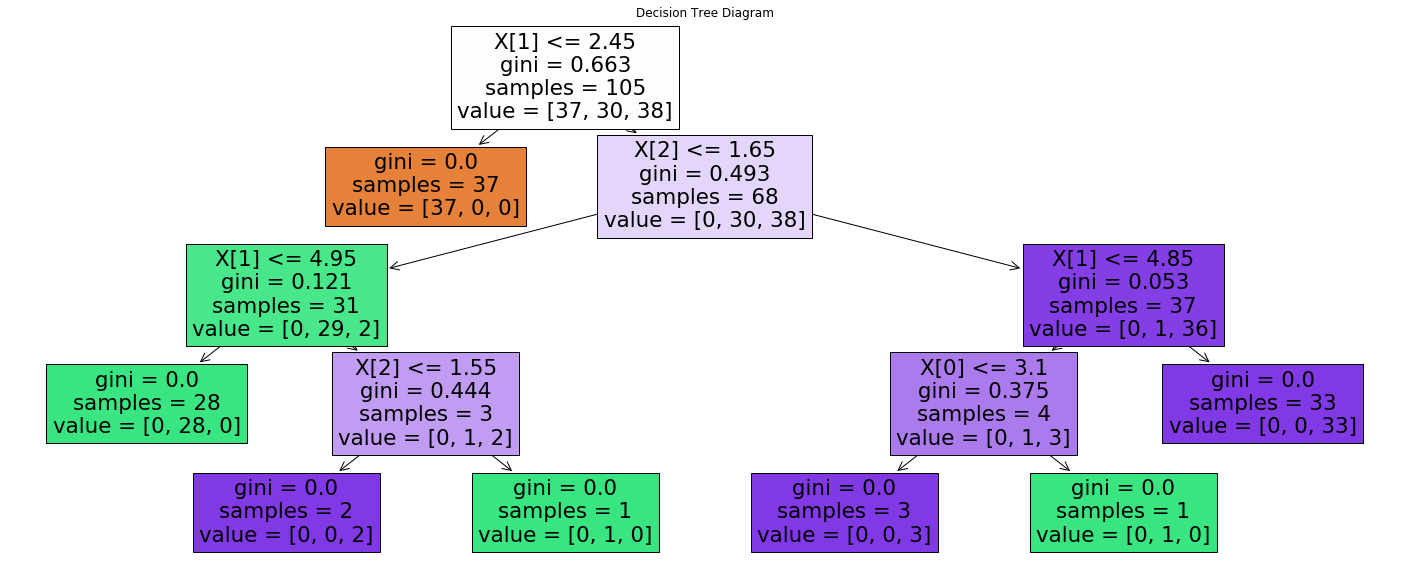

In [17]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(classifier,filled=True)
plt.title("Decision Tree Diagram")